In [ ]:
# Libraries importation

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting

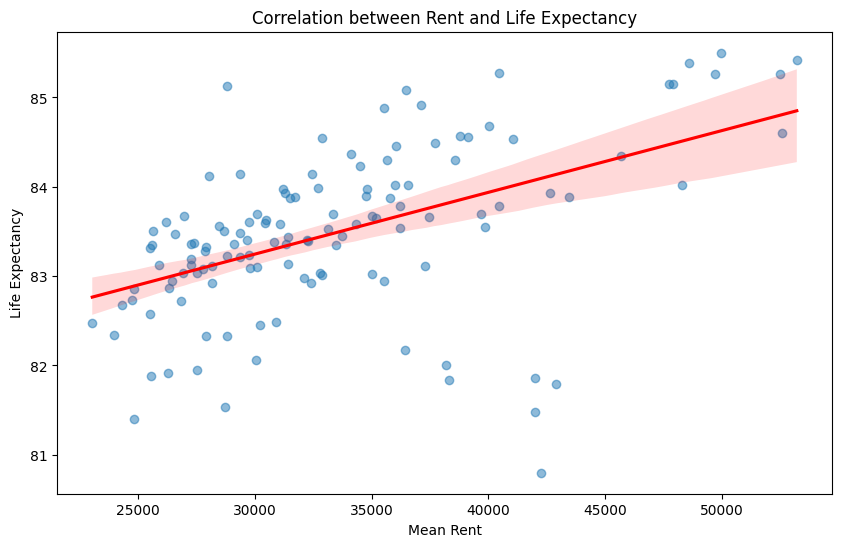

In [ ]:
# visualizing scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=merged_df['mean_rent'], y=merged_df['age_expectancy'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Mean Rent')
plt.ylabel('Life Expectancy')
plt.title('Correlation between Rent and Life Expectancy')
plt.show()

# Scatter Plot Conlusions
*   The scatter plot visually confirms the positive correlation between mean rent and life expectancy.
*   The trend line (in red) shows an upward slope, reinforcing that as rent increases, life expectancy tends to increase as well.
*   However, there is considerable spread in the data points, meaning that while the trend exists, it is not a perfect predictor.

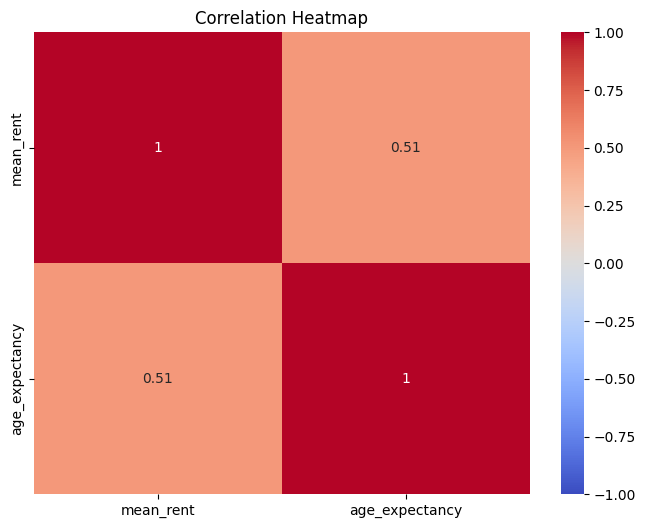

In [ ]:
# visualizing a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(merged_df[['mean_rent', 'age_expectancy']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Heat Map Conlusions
*   The heatmap shows a correlation coefficient of 0.51 between mean rent and life expectancy, which indicates a moderate positive correlation.
*   This suggests that in districts where rent is higher, life expectancy also tends to be higher.
*   However, this is not a very strong correlation, meaning other factors also significantly influence life expectancy.

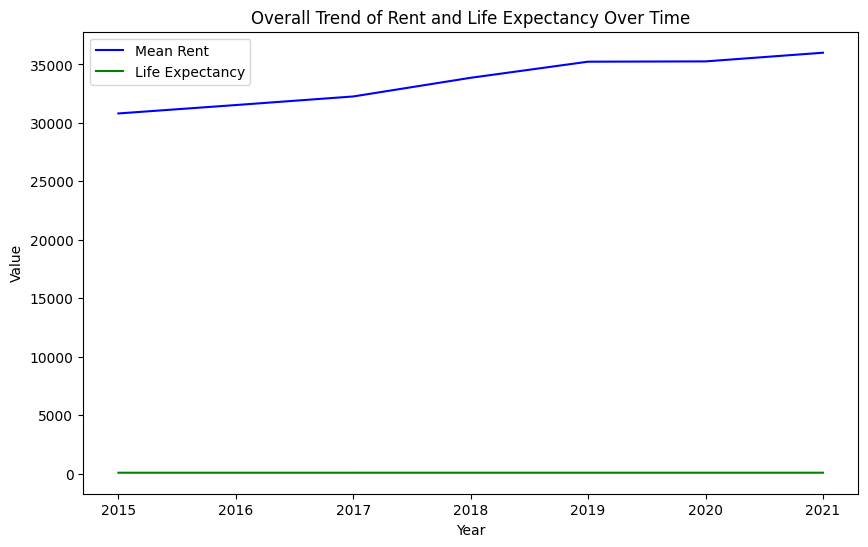

In [ ]:
# exploring the overall trend
df_grouped = merged_df.groupby('date_year').agg({'mean_rent': 'mean', 'age_expectancy': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='date_year', y='mean_rent', data=df_grouped, label='Mean Rent', color='blue')
sns.lineplot(x='date_year', y='age_expectancy', data=df_grouped, label='Life Expectancy', color='green')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Overall Trend of Rent and Life Expectancy Over Time')
plt.legend()
plt.show()


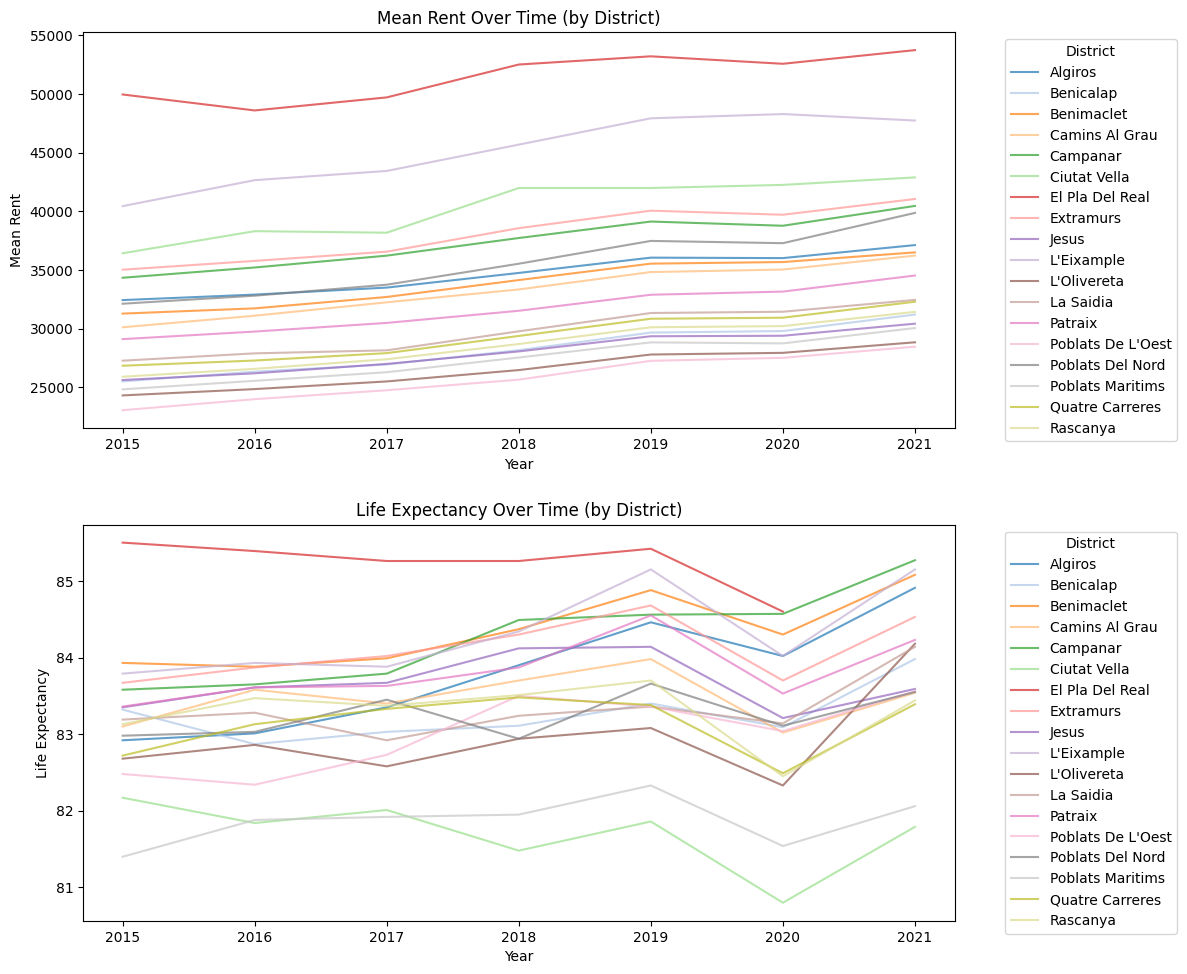

In [ ]:
# exploring the trend over time in rent and life expectancy for each district

# as seaborn can't show a plot with duplicated x-values, and we have each district(18 total) with data:
    # to avoid the error: get the mean per district per year
df_grouped = merged_df.groupby(['date_year', 'district']).agg({
    'mean_rent': 'mean',
    'age_expectancy': 'mean'
}).reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))

# plot of rent trend per district
plt.subplot(2, 1, 1)
sns.lineplot(x='date_year', y='mean_rent', hue='district', data=df_grouped, palette='tab20', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Mean Rent')
plt.title('Mean Rent Over Time (by District)')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')

# plot of life expectancy trend per district
plt.subplot(2, 1, 2)
sns.lineplot(x='date_year', y='age_expectancy', hue='district', data=df_grouped, palette='tab20', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Over Time (by District)')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# Trends Over Time Conlusions
*   The top graph shows that mean rent has generally been increasing over time in all districts, with some variations.
*   The bottom graph shows that life expectancy has also increased over time in most districts, but with some fluctuations.
*   This suggests that as rent has risen over the years, life expectancy has also increased, but the trend is not uniform across all districts. Some districts have experienced declines or stagnation in life expectancy.

In [ ]:
# to smooth fluctuactions and make visualizations simplier a rolling window method of size 3 is applied
df_grouped['mean_rent'] = df_grouped.groupby('district')['mean_rent'].transform(lambda x: x.rolling(3, 1).mean())
df_grouped['age_expectancy'] = df_grouped.groupby('district')['age_expectancy'].transform(lambda x: x.rolling(3, 1).mean())


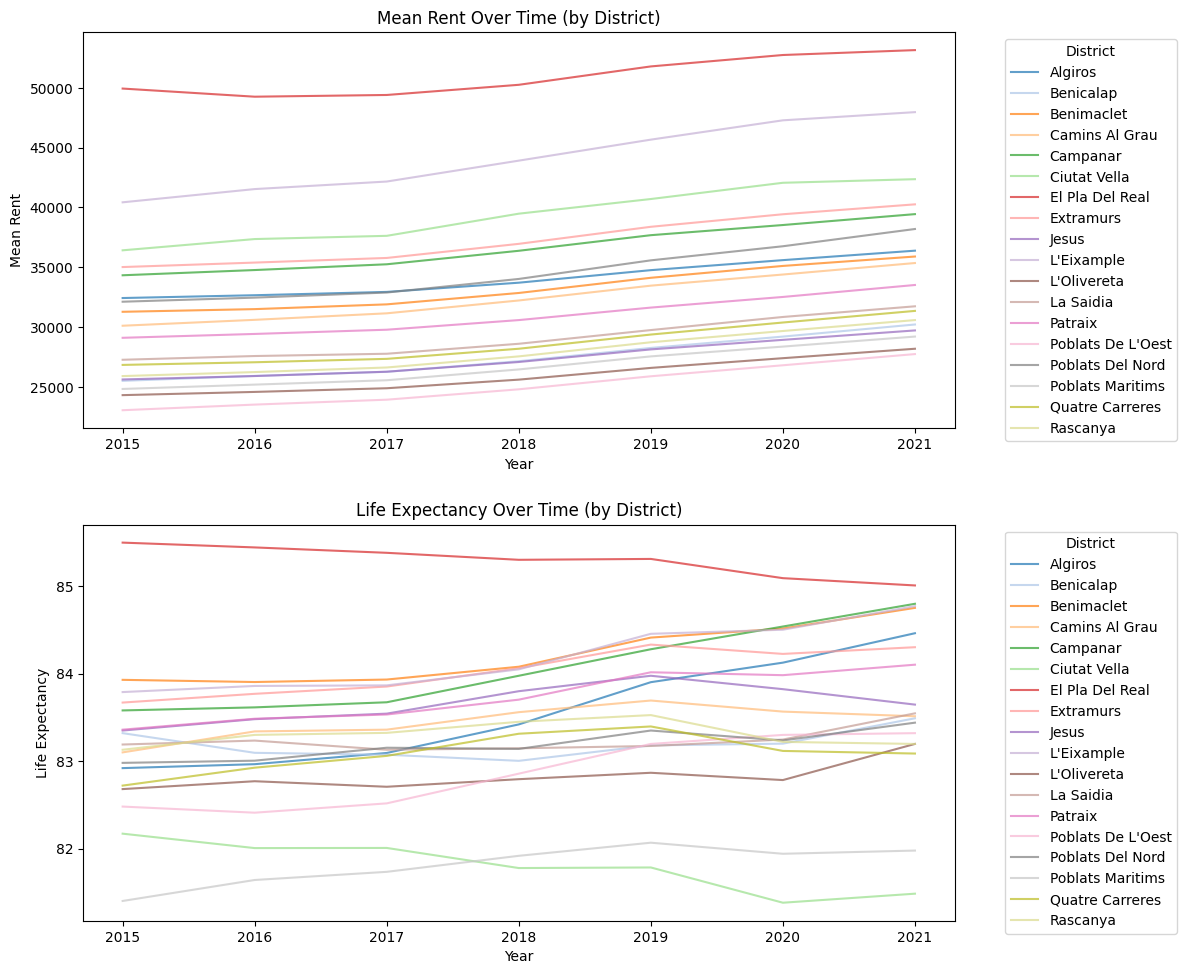

In [ ]:
# exploring the trend over time in rent and life expectancy for each district
    # plot hows clearer trends a rolling window method of size 3 is applied

plt.figure(figsize=(12, 10))

# plot of rent trend per district
plt.subplot(2, 1, 1)
sns.lineplot(x='date_year', y='mean_rent', hue='district', data=df_grouped, palette='tab20', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Mean Rent')
plt.title('Mean Rent Over Time (by District)')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')

# plot of life expectancy trend per district
plt.subplot(2, 1, 2)
sns.lineplot(x='date_year', y='age_expectancy', hue='district', data=df_grouped, palette='tab20', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Over Time (by District)')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Overall Conclusions

*   There is a moderate positive relationship between rent and life expectancy,
meaning districts with higher rent tend to have higher life expectancy.
*   The correlation does not imply causation, so other socio-economic factors (e.g., healthcare access, income levels, quality of infrastructure) likely contribute to life expectancy.
*   Over time, both rent and life expectancy have generally increased, but with district-specific variations.
*   Further analysis, such as including income levels or healthcare access data, could provide deeper insights into what drives these trends.